<a href="https://colab.research.google.com/github/VadymKalin/nvidia_certified_associate_generative_ai_llms/blob/main/cat_dog_classifier_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/31k0qimdnxo53rh/dogs-vs-cats.zip
!unzip "dogs-vs-cats.zip"
!rm "dogs-vs-cats.zip"
!unzip 'train.zip'
!unzip 'test1.zip'
!rm 'train.zip'
!rm 'test1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img
from sklearn.model_selection import train_test_split
import os

In [3]:
Image_width = 128
Image_height = 128
Image_size = (Image_width , Image_height)
Image_channel = 3

Image_rgb_size = (Image_width ,Image_height , 3 )

In [4]:
filenames = os.listdir('/content/train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)
data = pd.DataFrame({'filename' : filenames , 'category' : categories})
data.head()

,filename,category
0,dog.11191.jpg,dog
1,dog.10779.jpg,dog
2,dog.9670.jpg,dog
3,dog.4372.jpg,dog
4,cat.10149.jpg,cat


In [5]:
data['category'].value_counts()

,count
category,
dog,12500
cat,12500


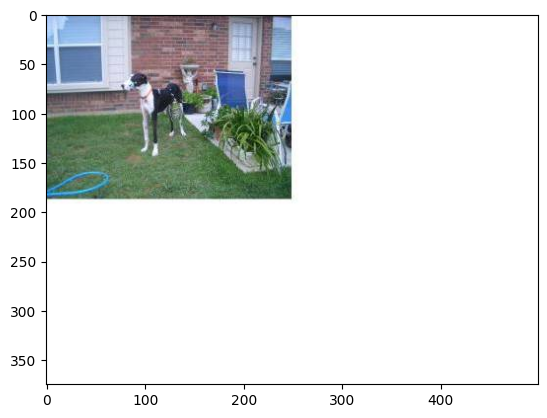

In [6]:
import random
sample = random.choice(filenames)
image = load_img(f'train/{sample}')
plt.imshow(image)
plt.show()

In [7]:
train_df , val_df = train_test_split(data , test_size = 0.2 , random_state = 42)
train_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)

In [8]:
train_df.shape , val_df.shape

((20000, 2), (5000, 2))

In [9]:
train_df.head()

,filename,category
0,dog.6186.jpg,dog
1,cat.9316.jpg,cat
2,dog.7417.jpg,dog
3,dog.6790.jpg,dog
4,dog.4762.jpg,dog


In [10]:


batch_size  = 32
epochs = 7
total_train = train_df.shape[0]
total_validate = val_df.shape[0]


train_dategen = ImageDataGenerator(rotation_range = 15 ,
                                  rescale = 1.0/255 ,
                                  shear_range = 0.1,
                                  zoom_range = 0.2 ,
                                  horizontal_flip = True ,
                                  width_shift_range = 0.1 ,
                                  height_shift_range = 0.1
                                  )



In [11]:
train_generator = train_dategen.flow_from_dataframe(
    train_df,
    "/content/train",
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = validation_datagen.flow_from_dataframe(
    val_df,
    "/content/train",
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [13]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , Activation , BatchNormalization

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid', input_shape=(128,128,3)))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 122, 122, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 59, 59, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 57, 57, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7290)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │       145,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,692 (588.64 KB)

 Trainable params: 150,692 (588.64 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
total_train = train_df.shape[0]
total_validate = val_df.shape[0]

history = model.fit(train_generator,epochs=epochs,
                    validation_data = val_generator,
                    validation_steps = total_validate//batch_size,
                    steps_per_epoch = total_train//batch_size)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 962s 2s/step - accuracy: 0.5469 - loss: 0.6931 - val_accuracy: 0.6240 - val_loss: 0.6435
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 980s 2s/step - accuracy: 0.6152 - loss: 0.6526 - val_accuracy: 0.6546 - val_loss: 0.6187
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 982s 2s/step - accuracy: 0.6413 - loss: 0.6319 - val_accuracy: 0.6681 - val_loss: 0.6035
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 985s 2s/step - accuracy: 0.6602 - loss: 0.6124 - val_accuracy: 0.6773 - val_loss: 0.5929
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 922s 1s/step - accuracy: 0.6707 - loss: 0.5987 - val_accuracy: 0.6919 - val_loss: 0.5808
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 928s 1s/step - accuracy: 0.6901 - loss: 0.5864 - val_accuracy: 0.7137 - val_loss: 0.5653
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 981s 1s/step - accuracy: 0.6953 - loss: 0.5781 - val_accuracy: 0.7292 - val_loss: 0.5428


In [16]:
# Save the model
model.save('dogs_vs_cats_model.h5')

# Install TensorFlow Serving packages (requires a restart of the Colab runtime)
# You might need to install this locally or on a dedicated server for production deployment
# !apt-get update && apt-get install tensorflow-model-server -y

# To prepare the model for TensorFlow Serving, you need to convert it to the SavedModel format.
import tensorflow as tf

model_name = 'dogs_vs_cats'
model_version = '1'
export_path = os.path.join('/content/', model_name, model_version)

tf.saved_model.save(model, export_path)

# You would then typically use TensorFlow Serving to deploy this model.
# This involves running a TensorFlow Serving instance and pointing it to the export_path.
# For local testing:
# !tensorflow_model_server \
#   --rest_api_port=8501 \
#   --model_name={model_name} \
#   --model_base_path={export_path} &

# To make predictions with the deployed model, you would send requests to the serving instance's API.
# Example using requests library (install if needed: !pip install requests):
# import json
# import requests

# # Example: Load and preprocess an image for prediction
# test_image_path = '/content/test1/10000.jpg' # Replace with a valid test image path
# img = load_img(test_image_path, target_size=Image_size)
# img_array = np.array(img) / 255.0
# img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

# # Create a prediction request
# data = json.dumps({"instances": img_array.tolist()})

# # Send the request to the local TensorFlow Serving instance
# headers = {"content-type": "application/json"}
# json_response = requests.post('http://localhost:8501/v1/models/dogs_vs_cats:predict', data=data, headers=headers)

# # Parse the response
# predictions = json.loads(json_response.text)['predictions']

# # Interpret the predictions (assuming class index 0 is 'cat' and 1 is 'dog')
# if np.argmax(predictions[0]) == 0:
#     print("Prediction: Cat")
# else:
#     print("Prediction: Dog")



# **Transfer Learning**

In [17]:
import tensorflow as tf
base = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet' , include_top = False ,
                                                       input_shape = Image_rgb_size)

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = Model(inputs = base.input, outputs = predictions)


from tensorflow.keras.optimizers import Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
mc = ModelCheckpoint(
        "resnet_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
callbacks = [earlystop , learning_rate_reduction,mc]


history = model.fit(
    train_generator ,
    epochs = epochs ,
    validation_data=val_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)



Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.8642 - loss: 0.3421 

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 8267s 13s/step - accuracy: 0.8643 - loss: 0.3419 - val_accuracy: 0.6679 - val_loss: 0.5561 - learning_rate: 1.0000e-04
Epoch 2/7
265/625 ━━━━━━━━━━━━━━━━━━━━ 1:13:51 12s/step - accuracy: 0.9566 - loss: 0.1195

KeyboardInterrupt: 

In [19]:
test_filenames = os.listdir('/content/test1')
test = pd.DataFrame({'filename' : test_filenames})
nb_samples = test.shape[0]

In [20]:
test.head()

,filename
0,10458.jpg
1,6823.jpg
2,730.jpg
3,12409.jpg
4,545.jpg


In [21]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test ,
    '/content/test1' ,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_size,
    batch_size=batch_size,
    shuffle=False
    )

Found 12500 validated image filenames.


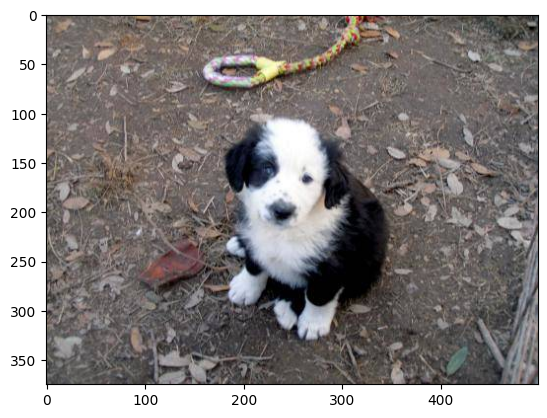

In [22]:
img_id = '1366.jpg'
image = load_img(f'/content/test1/{img_id}')
plt.imshow(image)

In [23]:
from tensorflow.keras.applications.resnet import preprocess_input


In [24]:
labels = {0:'Cats',1:'Dogs'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicton from model is Dogs


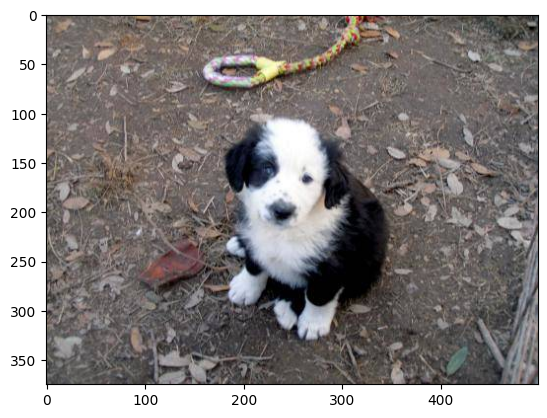

In [25]:
img_id = '1366.jpg'
image = load_img(f'/content/test1/{img_id}')
plt.imshow(image)

path = f'/content/test1/{img_id}'
img = load_img(path, target_size=Image_size)
import numpy as np
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)
print(f"Predicton from model is {labels[pred[0].argmax()]}")